# Week 3 Lab: Data Labeling & Annotation

**CS 203: Software Tools and Techniques for AI**  
**IIT Gandhinagar**

---

## Learning Objectives

By the end of this lab, you will be able to:

1. Set up and use Label Studio for annotation tasks
2. Create annotation interfaces for different data types
3. Write clear annotation guidelines
4. Calculate Inter-Annotator Agreement (IAA) metrics
5. Apply Cohen's Kappa and Fleiss' Kappa to measure label quality
6. Calculate IoU for spatial annotations

---

## Netflix Movie Theme

Continuing from Weeks 1-2, we'll label our cleaned movie reviews for sentiment analysis. This labeled data will be used for model training in later weeks.

---

## Part 1: Environment Setup

### 1.1 Install Required Packages

In [1]:
# Install required packages
!pip install label-studio scikit-learn statsmodels pandas numpy matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.5 MB 3.5 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.5 MB 5.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.5 MB 6.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.5 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 6.3 MB/s  0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)

   -------------

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

print("All imports successful!")

All imports successful!


---

## Part 2: Sample Data for Annotation

### 2.1 Create Movie Review Dataset

We'll create a set of movie reviews to annotate for sentiment.

In [ ]:
# Sample movie reviews for annotation
movie_reviews = [
    {"id": 1, "movie": "Inception", "Casts": "Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page", "review": "Mind-blowing! Nolan does it again with this masterpiece."},
    {"id": 2, "movie": "The Room", "Casts": "Tommy Wiseau, Juliette Danielle, Greg Sestero", "review": "So bad it's good. Hilarious unintentionally."},
    {"id": 3, "movie": "Parasite", "Casts": "Song Kang-ho, Lee Sun-kyun, Choi Woo-shik", "review": "Gripping from start to finish. Deserved every Oscar."},
    {"id": 4, "movie": "Cats", "Casts": "James Corden, Judi Dench, Ian McKellen", "review": "What did I just watch? Truly bizarre."},
    {"id": 5, "movie": "The Godfather", "Casts": "Marlon Brando, Al Paccino, James Caan", "review": "A timeless classic. Perfect in every way."},
    {"id": 6, "movie": "Avatar", "Casts": "Sam Worthington, Zoe Saldana, Sigourney Weaver", "review": "Visually stunning but the story is predictable."},
    {"id": 7, "movie": "The Dark Knight", "Casts": "Christian Bale, Heath Ledger, Aaron Eckhart", "review": "Heath Ledger's Joker is unforgettable."},
    {"id": 8, "movie": "Twilight",  "Casts": "Kristen Stewart, Robert Pattinson, Taylor Lautner", "review": "Not my cup of tea but I can see the appeal."},
    {"id": 9, "movie": "Interstellar", "Casts": "Matthew McConaughey, Anne Hathaway, Jessica Chastain", "review": "Made me cry. Beautiful exploration of love and time."},
    {"id": 10, "movie": "Emoji Movie", "Casts": "T.J. Miller, James Corden, Anna Faris", "review": "Just... no. Avoid at all costs."},
    {"id": 11, "movie": "Pulp Fiction", "Casts": "John Travolta, Samuel L. Jackson, Uma Thurman", "review": "Tarantino's dialogue is unmatched."},
    {"id": 12, "movie": "Sharknado",  "Casts": "Ian Ziering, Tara Reid, John Heard", "review": "Ridiculous premise but entertaining in a weird way."},
    {"id": 13, "movie": "The Shawshank Redemption", "Casts": "Tim Robbins, Morgan Freeman, Bob Gunton", "review": "Hope is a good thing. Best movie ever made."},
    {"id": 14, "movie": "Transformers 5", "Casts": "Mark Wahlberg, Anthony Hopkins, Isabela Moner", "review": "Explosions. That's it. That's the review."},
    {"id": 15, "movie": "La La Land", "Casts": "Ryan Gosling, Emma Stone, John Legend", "review": "Bittersweet ending that stays with you."},
    {"id": 16, "movie": "Batman v Superman",  "Casts": "Ben Affleck, Henry Cavill, Amy Adams", "review": "Had potential but ended up being a mess."},
    {"id": 17, "movie": "Spirited Away", "Casts": "Rumi Hiiragi, Miyu Irino, Mari Natsuki", "review": "Miyazaki's imagination knows no bounds."},
    {"id": 18, "movie": "The Last Airbender", "Casts": "Noah Ringer, Nicola Peltz, Jackson Rathbone", "review": "An insult to the animated series fans."},
    {"id": 19, "movie": "Coco", "Casts": "Anthony Gonzalez, Gael García Bernal, Benjamin Bratt", "review": "Pixar at its finest. Remember me..."},
    {"id": 20, "movie": "Justice League", "Casts": "Ben Affleck, Henry Cavill, Gal Gadot", "review": "Okay but nothing special. Just okay."},
]

df_reviews = pd.DataFrame(movie_reviews)
print(f"Created {len(df_reviews)} movie reviews for annotation")
df_reviews['review']

Created 20 movie reviews for annotation


0     Mind-blowing! Nolan does it again with this ma...
1          So bad it's good. Hilarious unintentionally.
2     Gripping from start to finish. Deserved every ...
3                 What did I just watch? Truly bizarre.
4             A timeless classic. Perfect in every way.
5       Visually stunning but the story is predictable.
6                Heath Ledger's Joker is unforgettable.
7           Not my cup of tea but I can see the appeal.
8     Made me cry. Beautiful exploration of love and...
9                       Just... no. Avoid at all costs.
10                   Tarantino's dialogue is unmatched.
11    Ridiculous premise but entertaining in a weird...
12          Hope is a good thing. Best movie ever made.
13            Explosions. That's it. That's the review.
14              Bittersweet ending that stays with you.
15             Had potential but ended up being a mess.
16              Miyazaki's imagination knows no bounds.
17               An insult to the animated serie

In [4]:
df_reviews['review'].to_csv('movie_reviews.csv', index=False)

### Question 2.1 (Solved): Export Data for Label Studio

Export the reviews in Label Studio's expected JSON format.

In [3]:
# SOLVED: Export for Label Studio
def export_for_label_studio(df, text_column='review'):
    """
    Export DataFrame to Label Studio JSON format.
    
    Label Studio expects a list of objects with a 'data' field.
    """
    tasks = []
    for _, row in df.iterrows():
        task = {
            "data": {
                "id": int(row['id']),
                "movie": row['movie'],
                "text": row[text_column]
            }
        }
        tasks.append(task)
    return tasks

tasks = export_for_label_studio(df_reviews)

# Save to file
with open('movie_reviews_for_labeling.json', 'w') as f:
    json.dump(tasks, f, indent=2)

print("Exported to movie_reviews_for_labeling.json")
print("\nSample task:")
print(json.dumps(tasks[0], indent=2))

Exported to movie_reviews_for_labeling.json

Sample task:
{
  "data": {
    "id": 1,
    "movie": "Inception",
    "text": "Mind-blowing! Nolan does it again with this masterpiece."
  }
}


### Question 2.2: Add More Fields for Export

Modify the export function to also include the movie title in the Label Studio interface.

In [4]:
# TODO: Modify the export function to include movie title
# The Label Studio interface should show both movie title and review

# Your code here
def export_for_label_studio(df, review_column='review', title_column='movie'):
    tasks = []
    for _, row in df.iterrows():
        task = {
            "data": {
                "id": int(row['id']),
                "title": row[title_column],
                "review": row[review_column]
            }
        }
        tasks.append(task)
    return tasks

tasks = export_for_label_studio(df_reviews)

# Save to file
with open('movie_reviews_for_labeling.json', 'w') as f:
    json.dump(tasks, f, indent=2)

print("Exported to movie_reviews_for_labeling.json")
print("\nSample task:")
print(json.dumps(tasks[0], indent=2))

Exported to movie_reviews_for_labeling.json

Sample task:
{
  "data": {
    "id": 1,
    "title": "Inception",
    "review": "Mind-blowing! Nolan does it again with this masterpiece."
  }
}


---

## Part 3: Label Studio Configuration

### 3.1 Understanding Label Studio XML Configs

Label Studio uses XML to define annotation interfaces.

In [10]:
# Text Classification Config for Sentiment Analysis
sentiment_config = '''
<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>
'''

print("Sentiment Classification Config:")
print(sentiment_config)

Sentiment Classification Config:

<View>
  <Header value="Movie Review Sentiment Analysis"/>
  <Text name="text" value="$text"/>
  <Choices name="sentiment" toName="text" choice="single">
    <Choice value="Positive" hotkey="1"/>
    <Choice value="Negative" hotkey="2"/>
    <Choice value="Neutral" hotkey="3"/>
    <Choice value="Mixed" hotkey="4"/>
  </Choices>
</View>



### Question 3.1 (Solved): Create NER Config

Create a Label Studio config for Named Entity Recognition on movie reviews.

In [11]:
# SOLVED: NER Config for Movie Reviews
ner_config = '''
<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>
'''

print("NER Config for Movie Reviews:")
print(ner_config)

NER Config for Movie Reviews:

<View>
  <Header value="Movie Entity Annotation"/>
  <Labels name="ner" toName="text">
    <Label value="MOVIE_TITLE" background="#FF0000"/>
    <Label value="ACTOR" background="#00FF00"/>
    <Label value="DIRECTOR" background="#0000FF"/>
    <Label value="CHARACTER" background="#FFA500"/>
    <Label value="AWARD" background="#800080"/>
  </Labels>
  <Text name="text" value="$text"/>
</View>



### Question 3.2: Create Multi-Label Classification Config

Create a config that allows multiple labels per review (e.g., "Funny", "Emotional", "Action-packed").

In [12]:
# TODO: Create multi-label classification config
# Hint: Use choice="multiple" instead of choice="single"

# Your config here
multi_label_config = '''
<View>
  <Header value="Multi Label Classification"/>
  <Text name="text" value="$text"/>
  <Choices name="multi-label" toName="text" choice="multiple">
    <Choice value="Funny" hotkey="1" />
    <Choice value="Emotional" hotkey="2" />
    <Choice value="Action-packed" hotkey="3" />
    <Choice value="CHARACTER" hotkey="4" />
    <Choice value="AWARD" hotkey="5" />
  </Choices>
</View>
'''

### Question 3.3: Create Image Classification Config

Create a config for classifying movie poster genres.

In [13]:
# TODO: Create image classification config for movie poster genre classification
# Include genres: Action, Comedy, Drama, Horror, Sci-Fi, Romance

# Your config here
classification_config = '''
<View>
    <Header value="Movie Poster Genre Classification"/>
    <Image name="image" value="$image" />
    <Choices name="classification" toName="text" choice="multiple">
        <Choice value="Action" hotkey="1" />
        <Choice value="Comedy" hotkey="2" />
        <Choice value="Drama" hotkey="3" />
        <Choice value="Horror" hotkey="4" />
        <Choice value="Sci-Fi" hotkey="5" />
        <Choice value="Romance" hotkey="6" />
    </Choices>
</View>
'''

---

## Part 4: Annotation Guidelines

### 4.1 Writing Clear Guidelines

Good annotation guidelines are crucial for consistent labels.

In [14]:
# Example annotation guidelines
annotation_guidelines = """
# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but poor direction."
- "Had potential but ended up being a mess."

## Edge Cases

### Sarcasm
If sarcasm is detected, label based on the ACTUAL meaning, not the literal words.
- "Oh great, another superhero movie. Just what we needed." → NEGATIVE

### "So bad it's good"
Movies praised ironically should be labeled MIXED (enjoyment exists but film quality is poor).
- "So bad it's good. Hilarious unintentionally." → MIXED

### Qualified Praise/Criticism
If the reviewer has reservations, use MIXED.
- "Not my cup of tea but I can see the appeal." → NEUTRAL (not recommending but not criticizing)

## When in Doubt
1. Re-read the review
2. Ask: "Would the reviewer recommend this movie?"
3. If still unclear, use NEUTRAL
"""

print(annotation_guidelines)


# Movie Review Sentiment Annotation Guidelines

## Task Overview
Classify movie reviews into sentiment categories based on the reviewer's opinion of the movie.

## Label Definitions

### POSITIVE
The reviewer clearly enjoyed the movie and recommends it.

**Examples:**
- "Mind-blowing! Nolan does it again with this masterpiece."
- "Best movie I've seen this year. A must-watch!"
- "Perfect in every way. 10/10."

### NEGATIVE
The reviewer clearly did not enjoy the movie and does not recommend it.

**Examples:**
- "Avoid at all costs. Complete waste of time."
- "An insult to the animated series fans."
- "Just... no. Terrible."

### NEUTRAL
The reviewer has no strong opinion either way, or the review is purely factual.

**Examples:**
- "It's okay. Nothing special."
- "The movie is 2 hours long and features action scenes."
- "Just okay."

### MIXED
The review contains both positive and negative aspects.

**Examples:**
- "Visually stunning but the story is predictable."
- "Great acting but p

### Question 4.1: Add Edge Cases to Guidelines

What other edge cases should be added to these guidelines?

In [5]:
# TODO: Write 3 additional edge cases that should be covered in the guidelines
# Consider: emojis, ratings, comparisons to other movies, etc.

additional_edge_cases = """
### Edge Case 1: Emojis in Reviews
If emojis are used, interpret their sentiment in context with the text.

### Edge Case 2: Ratings in Reviews
If numerical ratings are mentioned, consider them as part of the overall sentiment.

### Edge Case 3: Comparisons to Other Movies
If the review compares the movie to others, focus on the sentiment towards the movie being reviewed.
"""

# Your edge cases here


---

## Part 5: Simulating Annotations

### 5.1 Creating Simulated Annotator Data

For this lab, we'll simulate multiple annotators to practice IAA calculations.

In [16]:
# Simulated annotations from two annotators
np.random.seed(42)

# Ground truth labels (for simulation)
ground_truth = ['Positive', 'Mixed', 'Positive', 'Negative', 'Positive',
                'Mixed', 'Positive', 'Neutral', 'Positive', 'Negative',
                'Positive', 'Mixed', 'Positive', 'Negative', 'Mixed',
                'Negative', 'Positive', 'Negative', 'Positive', 'Neutral']

# Annotator 1: 90% accuracy
def simulate_annotator(true_labels, accuracy=0.9):
    labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
    annotations = []
    for true_label in true_labels:
        if np.random.random() < accuracy:
            annotations.append(true_label)
        else:
            # Random different label
            other_labels = [l for l in labels if l != true_label]
            annotations.append(np.random.choice(other_labels))
    return annotations

annotator1 = simulate_annotator(ground_truth, accuracy=0.85)
annotator2 = simulate_annotator(ground_truth, accuracy=0.80)
annotator3 = simulate_annotator(ground_truth, accuracy=0.75)

# Create DataFrame
annotations_df = pd.DataFrame({
    'review_id': range(1, 21),
    'annotator_1': annotator1,
    'annotator_2': annotator2,
    'annotator_3': annotator3,
    'ground_truth': ground_truth
})

print("Simulated Annotations:")
annotations_df

Simulated Annotations:


,review_id,annotator_1,annotator_2,annotator_3,ground_truth
0,1,Positive,Positive,Neutral,Positive
1,2,Neutral,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive
7,8,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative


### Question 5.1 (Solved): Calculate Percent Agreement

Calculate the simple percent agreement between annotators.

In [17]:
# SOLVED: Calculate percent agreement
def percent_agreement(labels1, labels2):
    """
    Calculate the percentage of items where two annotators agree.
    """
    agreements = sum(l1 == l2 for l1, l2 in zip(labels1, labels2))
    return agreements / len(labels1)

# Calculate pairwise agreements
pa_1_2 = percent_agreement(annotator1, annotator2)
pa_1_3 = percent_agreement(annotator1, annotator3)
pa_2_3 = percent_agreement(annotator2, annotator3)

print(f"Percent Agreement (Annotator 1 vs 2): {pa_1_2:.2%}")
print(f"Percent Agreement (Annotator 1 vs 3): {pa_1_3:.2%}")
print(f"Percent Agreement (Annotator 2 vs 3): {pa_2_3:.2%}")
print(f"\nAverage Pairwise Agreement: {(pa_1_2 + pa_1_3 + pa_2_3) / 3:.2%}")

Percent Agreement (Annotator 1 vs 2): 85.00%
Percent Agreement (Annotator 1 vs 3): 55.00%
Percent Agreement (Annotator 2 vs 3): 55.00%

Average Pairwise Agreement: 65.00%


### Question 5.2: Why is Percent Agreement Not Enough?

Explain the limitation of percent agreement.

In [18]:
# TODO: Write your explanation here
# Hint: Consider what happens with random guessing in a binary classification task

explanation = """
In binary classification task, There 50% probability that both agree by change because each lable has 50% probablity to be selected.
As the number of classes increases, the probability of random agreement decreases. So Percent Agreement is Not Enough to measure inter-annotator reliability.
We need some other metric which tells us "How much better than random we are?"
"""

---

## Part 6: Cohen's Kappa

### 6.1 Understanding Cohen's Kappa

Cohen's Kappa accounts for agreement by chance.

In [ ]:
# Cohen's Kappa formula explanation
print("""
Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
            1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect
""")


Cohen's Kappa Formula:

           P_observed - P_expected
kappa = ────────────────────────────
            1 - P_expected

Where:
- P_observed = Actual agreement rate
- P_expected = Expected agreement by chance

Interpretation:
- kappa < 0.00: Poor (worse than chance)
- 0.00 - 0.20: Slight
- 0.21 - 0.40: Fair
- 0.41 - 0.60: Moderate
- 0.61 - 0.80: Substantial
- 0.81 - 1.00: Almost Perfect



### Question 6.1 (Solved): Calculate Cohen's Kappa Step-by-Step

In [20]:
# SOLVED: Manual Cohen's Kappa calculation
def cohens_kappa_manual(labels1, labels2):
    """
    Calculate Cohen's Kappa step by step.
    """
    # Step 1: Create confusion matrix
    unique_labels = sorted(set(labels1) | set(labels2))
    n = len(labels1)
    
    # Count agreements and marginals
    confusion = {}
    for l1 in unique_labels:
        confusion[l1] = {l2: 0 for l2 in unique_labels}
    
    for l1, l2 in zip(labels1, labels2):
        confusion[l1][l2] += 1
    
    # Step 2: Calculate observed agreement
    p_observed = sum(confusion[l][l] for l in unique_labels) / n
    
    # Step 3: Calculate expected agreement
    marginals_1 = {l: sum(1 for x in labels1 if x == l) / n for l in unique_labels}
    marginals_2 = {l: sum(1 for x in labels2 if x == l) / n for l in unique_labels}
    
    p_expected = sum(marginals_1[l] * marginals_2[l] for l in unique_labels)
    
    # Step 4: Calculate kappa
    kappa = (p_observed - p_expected) / (1 - p_expected)
    
    print(f"Observed Agreement (P_o): {p_observed:.4f}")
    print(f"Expected Agreement (P_e): {p_expected:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    
    return kappa

print("Annotator 1 vs Annotator 2:")
kappa_1_2 = cohens_kappa_manual(annotator1, annotator2)

print("\n" + "="*50 + "\n")

# Verify with sklearn
from sklearn.metrics import cohen_kappa_score
sklearn_kappa = cohen_kappa_score(annotator1, annotator2)
print(f"Sklearn Cohen's Kappa: {sklearn_kappa:.4f}")

Annotator 1 vs Annotator 2:
Observed Agreement (P_o): 0.8500
Expected Agreement (P_e): 0.2875
Cohen's Kappa: 0.7895


Sklearn Cohen's Kappa: 0.7895


### Question 6.2: Calculate All Pairwise Kappas

In [21]:
# TODO: Calculate Cohen's Kappa for all pairs of annotators
# Use sklearn's cohen_kappa_score function

# Your code here
kappa_12 = cohen_kappa_score(annotator1, annotator2)
kappa_13 = cohen_kappa_score(annotator1, annotator3)
kappa_23 = cohen_kappa_score(annotator2, annotator3)

print(f"Kappa (Annotator 1 vs 2): {kappa_12:.2%}")
print(f"Kappa (Annotator 1 vs 3): {kappa_13:.2%}")
print(f"Kappa (Annotator 2 vs 3): {kappa_23:.2%}")

Kappa (Annotator 1 vs 2): 78.95%
Kappa (Annotator 1 vs 3): 38.78%
Kappa (Annotator 2 vs 3): 37.93%


### Question 6.3: Visualize Agreement with Confusion Matrix

<Axes: >

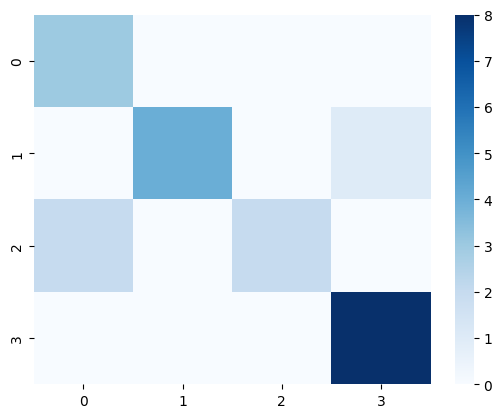

In [22]:
# TODO: Create a confusion matrix heatmap for Annotator 1 vs Annotator 2
# Hint: Use sklearn's confusion_matrix and seaborn's heatmap

# Your code here
confusion_12 = confusion_matrix(annotator1, annotator2)
sns.heatmap(confusion_12, cmap='Blues')

---

## Part 7: Fleiss' Kappa for Multiple Annotators

### 7.1 Understanding Fleiss' Kappa

When you have more than 2 annotators, use Fleiss' Kappa.

In [23]:
# Fleiss' Kappa using statsmodels
from statsmodels.stats.inter_rater import fleiss_kappa, aggregate_raters

# Prepare data for Fleiss' Kappa
# Format: (n_items, n_categories) matrix with counts

labels = ['Positive', 'Negative', 'Neutral', 'Mixed']
n_items = len(annotator1)

# Create matrix
data_matrix = []
for i in range(n_items):
    row = [0, 0, 0, 0]  # Counts for each category
    for ann in [annotator1[i], annotator2[i], annotator3[i]]:
        row[labels.index(ann)] += 1
    data_matrix.append(row)

data_matrix = np.array(data_matrix)
print("Data matrix shape:", data_matrix.shape)
print("\nFirst 5 rows (counts per category):")
print(pd.DataFrame(data_matrix[:5], columns=labels))

Data matrix shape: (20, 4)

First 5 rows (counts per category):
   Positive  Negative  Neutral  Mixed
0         2         0        1      0
1         0         0        1      2
2         3         0        0      0
3         0         3        0      0
4         3         0        0      0


### Question 7.1 (Solved): Calculate Fleiss' Kappa

In [24]:
# SOLVED: Calculate Fleiss' Kappa
fk = fleiss_kappa(data_matrix)
print(f"Fleiss' Kappa (3 annotators): {fk:.4f}")

# Interpret
if fk < 0:
    print("Interpretation: Poor (worse than chance)")
elif fk < 0.20:
    print("Interpretation: Slight agreement")
elif fk < 0.40:
    print("Interpretation: Fair agreement")
elif fk < 0.60:
    print("Interpretation: Moderate agreement")
elif fk < 0.80:
    print("Interpretation: Substantial agreement")
else:
    print("Interpretation: Almost perfect agreement")

Fleiss' Kappa (3 annotators): 0.5135
Interpretation: Moderate agreement


### Question 7.2: How Would You Improve Agreement?

Based on the Fleiss' Kappa score, what actions would you take?

In [25]:
# TODO: Write 3 specific actions to improve annotator agreement

improvement_actions = """
1. Make a strict annotation guideline to improve the agreement between the annotators.

2. Conduct training for annotators to calibrate rounds until k > 0.8 is achieved. Train them with small batch of examples 

3. Inject a small portion (10%) of pre-labeled, trusted items into the stream. This keep quality high during the production.
"""

---

## Part 8: IoU for Spatial Annotations

### 8.1 Intersection over Union (IoU)

For bounding boxes and segmentation, we use IoU to measure agreement.

In [26]:
# IoU explanation
print("""
Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
         Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │////////│       │
      │    │//Ovrlp/│       │
      └────┼────────┘       │
           │                │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match
""")


Intersection over Union (IoU):

           Area of Overlap
IoU = ─────────────────────────
         Area of Union

      ┌─────────────┐
      │    ┌────────┼───────┐
      │    │////////│       │
      │    │//Ovrlp/│       │
      └────┼────────┘       │
           │                │
           └────────────────┘

IoU = Overlap / (Box1 + Box2 - Overlap)

Thresholds:
- IoU > 0.5: Match (standard)
- IoU > 0.7: Good match
- IoU > 0.9: Excellent match



### Question 8.1 (Solved): Implement IoU Calculation

In [27]:
# SOLVED: IoU Implementation
def calculate_iou(box1, box2):
    """
    Calculate IoU between two bounding boxes.
    
    Args:
        box1, box2: Lists of [x1, y1, x2, y2] coordinates
    
    Returns:
        IoU value (0 to 1)
    """
    # Calculate intersection coordinates
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    # Check for no overlap
    if x2 < x1 or y2 < y1:
        return 0.0
    
    # Calculate areas
    intersection = (x2 - x1) * (y2 - y1)
    
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    union = area1 + area2 - intersection
    
    return intersection / union

# Test cases
box1 = [0, 0, 100, 100]  # 100x100 box at origin
box2 = [50, 50, 150, 150]  # 100x100 box shifted by 50
box3 = [200, 200, 300, 300]  # No overlap
box4 = [25, 25, 75, 75]  # Contained within box1

print(f"IoU(box1, box2): {calculate_iou(box1, box2):.4f}")  # Partial overlap
print(f"IoU(box1, box3): {calculate_iou(box1, box3):.4f}")  # No overlap
print(f"IoU(box1, box4): {calculate_iou(box1, box4):.4f}")  # One inside other

IoU(box1, box2): 0.1429
IoU(box1, box3): 0.0000
IoU(box1, box4): 0.2500


### Question 8.2: Calculate IoU for Movie Poster Annotations

Two annotators drew bounding boxes around movie titles on posters. Calculate their IoU.

In [28]:
# Bounding box annotations from two annotators
poster_annotations = [
    {"poster": "Inception", "ann1": [100, 50, 300, 100], "ann2": [95, 55, 305, 98]},
    {"poster": "The Matrix", "ann1": [50, 100, 250, 180], "ann2": [60, 105, 240, 175]},
    {"poster": "Avatar", "ann1": [120, 80, 280, 150], "ann2": [125, 78, 275, 155]},
    {"poster": "Titanic", "ann1": [80, 60, 320, 120], "ann2": [100, 70, 310, 115]},
]

# TODO: Calculate IoU for each poster and compute the mean IoU

# Your code here
IoU = {}
for poster in poster_annotations:
    IoU[poster['poster']] = calculate_iou(poster['ann1'], poster['ann2'])
    
for poster, iou in IoU.items():
    print(f"IoU for {poster} is {iou:.2f}")
    
print(f"Mean IoU {sum(IoU.values())/len(IoU.values()):.2f}")

IoU for Inception is 0.82
IoU for The Matrix is 0.79
IoU for Avatar is 0.86
IoU for Titanic is 0.66
Mean IoU 0.78


### Question 8.3: Visualize Bounding Box Overlap

In [1]:
# TODO: Create a visualization showing two overlapping bounding boxes
# Use matplotlib to draw rectangles
# Hint: matplotlib.patches.Rectangle

import matplotlib.patches as patches

# Your code here
box1 = [60, 60, 320, 120]
box2 = [100, 70, 310, 115]

fig, ax = plt.subplots()

rect1 = patches.Rectangle((box1[0], box1[1]), box1[2], box1[3], linewidth=1, facecolor='blue')
rect2 = patches.Rectangle((box2[0], box2[1]), box2[2], box2[3], linewidth=1, facecolor='red')

ax.add_patch(rect1)
ax.add_patch(rect2)

ax.set_xlim(0, 500)
ax.set_ylim(0, 200)
ax.set_aspect('equal')

plt.show()

NameError: name 'plt' is not defined

---

## Part 9: Majority Voting and Adjudication

### 9.1 Resolving Disagreements

In [30]:
# Majority voting implementation
def majority_vote(annotations):
    """
    Return the most common label from a list of annotations.
    """
    from collections import Counter
    counts = Counter(annotations)
    return counts.most_common(1)[0][0]

# Apply majority voting
final_labels = []
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    final_labels.append(majority_vote(annotations))

annotations_df['majority_vote'] = final_labels
print("Labels with Majority Vote:")
annotations_df[['review_id', 'annotator_1', 'annotator_2', 'annotator_3', 'majority_vote', 'ground_truth']].head(10)

Labels with Majority Vote:


,review_id,annotator_1,annotator_2,annotator_3,majority_vote,ground_truth
0,1,Positive,Positive,Neutral,Positive,Positive
1,2,Neutral,Mixed,Mixed,Mixed,Mixed
2,3,Positive,Positive,Positive,Positive,Positive
3,4,Negative,Negative,Negative,Negative,Negative
4,5,Positive,Positive,Positive,Positive,Positive
5,6,Mixed,Mixed,Mixed,Mixed,Mixed
6,7,Positive,Positive,Neutral,Positive,Positive
7,8,Neutral,Neutral,Neutral,Neutral,Neutral
8,9,Positive,Positive,Positive,Positive,Positive
9,10,Negative,Negative,Mixed,Negative,Negative


### Question 9.1: Identify Disagreements for Expert Review

In [31]:
# TODO: Identify reviews where all 3 annotators disagree (no majority)
# These should be sent to an expert for adjudication

# Your code here
def all_disagree(annotation):
    if len(annotation) == len(set(annotation)):
        return annotation
            
disagreements = []
for i in range(len(annotator1)):
    annotations = [annotator1[i], annotator2[i], annotator3[i]]
    disagreement = all_disagree(annotations)
    if disagreement is not None:
        disagreements.append(True)
    else:
        disagreements.append(False)
        

annotations_df['disagreements'] = disagreements
print("Labels with Disagreements")
annotations_df[['review_id', 'annotator_1', 'annotator_2', 'annotator_3', 'disagreements', 'ground_truth']].tail(10)

Labels with Disagreements


,review_id,annotator_1,annotator_2,annotator_3,disagreements,ground_truth
10,11,Positive,Positive,Neutral,False,Positive
11,12,Mixed,Mixed,Mixed,False,Mixed
12,13,Neutral,Neutral,Positive,False,Positive
13,14,Negative,Positive,Negative,False,Negative
14,15,Mixed,Mixed,Mixed,False,Mixed
15,16,Negative,Negative,Negative,False,Negative
16,17,Positive,Positive,Neutral,False,Positive
17,18,Negative,Negative,Positive,False,Negative
18,19,Positive,Positive,Positive,False,Positive
19,20,Neutral,Mixed,Positive,True,Neutral


### Question 9.2: Implement Weighted Voting

In [32]:
# TODO: Implement weighted voting where annotator votes are weighted by their accuracy
# Annotator 1 accuracy: 85%, Annotator 2: 80%, Annotator 3: 75%

def weighted_vote(annotations, weights):
    """
    Return the label with highest weighted vote.
    
    Args:
        annotations: List of labels from each annotator
        weights: List of weights for each annotator
    
    Returns:
        Label with highest weighted sum
    """
    # Your code here
    weighted = {}
    for i in range(len(annotations)):
        weighted[annotations[i]] = weighted.get(annotations[i], 0) + weights[i]
    return max(weighted.items(), key=lambda item: item[1])[0]

# Test your function
we_annotations = ["Positive", "Positive", "Neutral"]
we = [.45, .20, .75]

weighted_vote(we_annotations, we)

'Neutral'

---

## Part 10: Quality Dashboard

### Question 10.1: Create an Annotator Quality Dashboard

In [33]:
# TODO: Create a quality dashboard showing:
# 1. Each annotator's accuracy vs ground truth
# 2. Pairwise kappa scores
# 3. Number of labels per category for each annotator

# Your code here

def get_dashboard(annotators_df):
    # accuracy vs ground truth
    accuracies = {}
    for col in ['annotator_1', 'annotator_2', 'annotator_3']:
        correct = sum(annotators_df[col] == annotators_df['ground_truth'])
        accuracies[col] = correct / len(annotators_df)
    print("Annotator Accuracies:")
    for annotator, acc in accuracies.items():
        print(f"{annotator}: {acc:.2%}")
    # pairwise kappa scores
    kappa_scores = {}
    annotator_cols = ['annotator_1', 'annotator_2', 'annotator_3']
    for i in range(len(annotator_cols)):
        for j in range(i+1, len(annotator_cols)):
            col1 = annotator_cols[i]
            col2 = annotator_cols[j]
            kappa = cohen_kappa_score(annotators_df[col1], annotators_df[col2])
            kappa_scores[f"{col1} vs {col2}"] = kappa
    print("\nPairwise Kappa Scores:")
    for pair, kappa in kappa_scores.items():
        print(f"{pair}: {kappa:.4f}")
    
    # number of labels per category for each annotator
    print("\nLabel Distribution per Annotator:")
    for col in annotator_cols:
        print(f"\n{col} label counts:")
        print(annotators_df[col].value_counts())
get_dashboard(annotations_df)

Annotator Accuracies:
annotator_1: 90.00%
annotator_2: 85.00%
annotator_3: 65.00%

Pairwise Kappa Scores:
annotator_1 vs annotator_2: 0.7895
annotator_1 vs annotator_3: 0.3878
annotator_2 vs annotator_3: 0.3793

Label Distribution per Annotator:

annotator_1 label counts:
annotator_1
Positive    8
Negative    5
Neutral     4
Mixed       3
Name: count, dtype: int64

annotator_2 label counts:
annotator_2
Positive    9
Mixed       5
Negative    4
Neutral     2
Name: count, dtype: int64

annotator_3 label counts:
annotator_3
Positive    7
Neutral     5
Mixed       5
Negative    3
Name: count, dtype: int64


---

## Challenge Problems

### Challenge 1: Krippendorff's Alpha

Implement Krippendorff's Alpha, which handles missing data and ordinal categories.

In [37]:
# Challenge: Implement Krippendorff's Alpha
# This metric handles:
# - Any number of annotators
# - Missing data
# - Different types of data (nominal, ordinal, interval, ratio)

from itertools import combinations

# Your code here
def krippendorffs_alpha(data, ):
    # data cleaning
    n_annotators, n_labels = len(data), len(data[0])   
    
    values = sorted(set(label for row in data for label in row if label is not None))
    val_to_idx = {v: i for i, v in enumerate(values)}
    n_values = len(values)
    
    # P_observed calculation
    Po = 0.0
    n_pairs = 0
    for i in range(n_labels):
        col = [data[j][i] for j in range(n_annotators) if data[j][i] is not None]
        for a, b in combinations(col, 2):
            if a != b:
                Po += 1
            n_pairs += 1
    if n_pairs == 0:
        return 1.0
    Po /= n_pairs
    
    # P_expected calculation
    freq = {v: 0 for v in values}
    for row in data:
        for v in row:
            if v is not None:
                freq[v] += 1
                
    N = sum(freq.values())
    Pe = 0.0
    for i in values:
        for j in values:
            if i != j:
                Pe += freq[i] * freq[j] * (0 if i == j else 1)
    Pe /= (N * (N - 1))
    
    if Pe == 0:
        return 1.0
    
    return (Po - Pe) / (1 - Pe)

annotations = [
    [1, 2, 3, None, 2],
    [1, 2, 2, 3,    2],
    [1, 2, 3, 3, None]
]

krippendorffs_alpha(annotations)

-1.6590909090909087

### Challenge 2: Annotation Cost Estimator

In [2]:
# Challenge: Build a function that estimates annotation cost
# Input: number of items, task type, quality level (redundancy)
# Output: estimated cost in USD and time in hours

def estimate_annotation_cost(n_items, task_type, quality_level, domain='general'):
    """
    Estimate the cost and time for an annotation project.
    
    Args:
        n_items: Number of items to annotate
        task_type: 'text_classification', 'ner', 'bbox', 'segmentation'
        quality_level: 'low' (1 annotator), 'medium' (2), 'high' (3)
        domain: 'general' or 'expert'
    
    Returns:
        dict with cost_usd, time_hours, annotators_needed
    """
    # Your code here
    base_rates = {
        'text_classification': 1,
        'ner': 4,
        'bbox': 5,
        'segmentation': 6
    }
    base_times = {
        'text_classification': 0.01,
        'ner': 0.03,
        'bbox': 0.05,
        'segmentation': 0.08
    }
    annotators_needed = {
        'low': 1,
        'medium': 2,
        'high': 3
    }
    return {
        "cost_usd": n_items * base_rates[task_type],
        "time_hours": n_items * base_times[task_type]/annotators_needed[quality_level],
        "annotators_needed": annotators_needed[quality_level]
    }

# Test with:
estimate_annotation_cost(10000, 'text_classification', 'high')


{'cost_usd': 10000, 'time_hours': 33.333333333333336, 'annotators_needed': 3}

### Challenge 3: Label Studio API Integration

Read label studio API documentation here: https://api.labelstud.io/api-reference/introduction/getting-started

In [ ]:
# Challenge: Write functions to interact with Label Studio API
# - Create a project
# - Import tasks
# - Export annotations

# Note: Requires running Label Studio locally
# pip install label-studio
# label-studio start

import requests

class LabelStudioClient:
    def __init__(self, url='http://localhost:8080', api_key=None):
        self.url = url
        self.api_key = api_key
        self.headers = {'Authorization': f'Token {api_key}'}
    
    def create_project(self, title, config):
        """Create a new annotation project."""
        payload = {
            "title": title,
            "label_config": config
        }
        response = requests.post(f"{self.url}/api/projects/", json=payload, headers=self.headers)
        if not response.ok:
            raise Exception(f"Error creating project: {response.text}")
        return response.json()
    
    def import_tasks(self, project_id, tasks):
        """Import tasks to a project."""
        response = requests.post(f"{self.url}/api/projects/{project_id}/import/", json=tasks, headers=self.headers)
        if not response.ok:
            raise Exception(f"Error importing tasks: {response.text}")
        return response.json()
    
    def export_annotations(self, project_id, tasks, preannotated_from_fields=None):
        """Export annotations from a project."""
        responses = requests.get(f"{self.url}/api/projects/{project_id}/export/", headers=self.headers)
        if not responses.ok:
            raise Exception(f"Error exporting annotations: {responses.text}")
        return responses.json()


---

## Summary

In this lab, you learned:

1. **Label Studio Setup**: Creating annotation interfaces with XML configs
2. **Annotation Guidelines**: Writing clear, comprehensive guidelines with edge cases
3. **Percent Agreement**: Simple but limited measure of annotator agreement
4. **Cohen's Kappa**: Agreement metric that accounts for chance (2 annotators)
5. **Fleiss' Kappa**: Extension for multiple annotators
6. **IoU**: Measuring agreement for spatial annotations
7. **Majority Voting**: Resolving disagreements between annotators

### Key Takeaways

- **Kappa >= 0.8** is the target for production annotation tasks
- Clear guidelines with examples reduce disagreements
- Multiple annotators + adjudication = higher quality labels
- Different metrics for different annotation types

### Next Week

Week 4: Optimizing Labeling with Active Learning, Weak Supervision, and LLMs!